In [1]:
!pip install imbalanced-learn pandas scikit-learn matplotlib seaborn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.7.0-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl (41.0 MB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached pandas-2.3.0-cp

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from collections import Counter


In [5]:
# Load your dataset
df = pd.read_csv('all_three.csv')
df.head()


,Unnamed: 0,balance,label,rec/sent,amount,block_id,size,weight,version,lock_time,...,input_total_usd,output_total,output_total_usd,fee,fee_usd,fee_per_kb,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total
0,0,2066.945478,0,1,0.015200,663747,382,768,1,0,...,896.1536,3022726,884.4496,40000,11.7040,104712.0,30.6387,52083.3,15.2395,0.000681
1,1,2066.947778,0,1,0.002300,663747,553,1888,2,0,...,22911.3086,78232305,22890.7715,70184,20.5358,126915.0,37.1353,37173.7,10.8771,0.017419
2,2,2067.138684,0,1,0.190906,663747,2396,9256,1,0,...,96996.8984,331229754,96917.8281,270246,79.0740,112790.0,33.0024,29196.8,8.5430,0.114951
3,3,2067.145448,0,1,0.006764,663747,2404,9288,1,0,...,101261.4922,345803640,101182.1484,271178,79.3467,112803.0,33.0062,29196.6,8.5430,0.120005
4,4,2067.164740,0,1,0.019292,663747,225,576,2,0,...,12076.4336,41252624,12070.5176,20218,5.9158,89857.8,26.2924,35100.7,10.2706,0.014312


In [6]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427625 entries, 0 to 427624
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        427625 non-null  int64  
 1   balance           427625 non-null  float64
 2   label             427625 non-null  int64  
 3   rec/sent          427625 non-null  int64  
 4   amount            427625 non-null  float64
 5   block_id          427625 non-null  int64  
 6   size              427625 non-null  int64  
 7   weight            427625 non-null  int64  
 8   version           427625 non-null  int64  
 9   lock_time         427625 non-null  int64  
 10  is_coinbase       427625 non-null  int64  
 11  has_witness       427625 non-null  int64  
 12  input_count       427625 non-null  int64  
 13  output_count      427625 non-null  int64  
 14  input_total       427625 non-null  int64  
 15  input_total_usd   427625 non-null  float64
 16  output_total      42

Original class distribution:
label
0    335847
2     55390
3     34134
1      2254
Name: count, dtype: int64


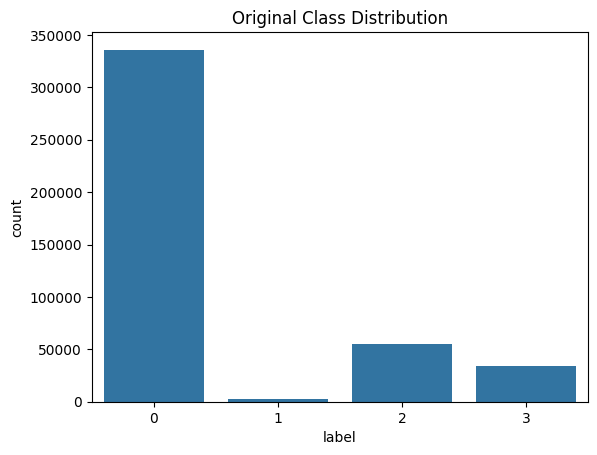

In [9]:
# Assuming target column is named 'target' (replace with actual column name)
print("Original class distribution:")
print(df['label'].value_counts())

# Visualizing class imbalance
sns.countplot(x='label', data=df)
plt.title('Original Class Distribution')
plt.show()


In [11]:
# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode categorical variables if any
X = pd.get_dummies(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Training set class distribution:")
print(Counter(y_train))


Training set class distribution:
Counter({0: 268678, 2: 44312, 3: 27307, 1: 1803})


After ADASYN class distribution:
Counter({1: 268732, 0: 268678, 2: 268660, 3: 268255})


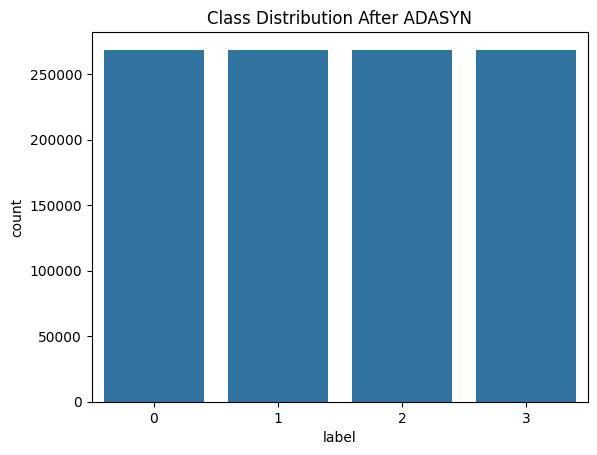

In [13]:
# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

print("After ADASYN class distribution:")
print(Counter(y_resampled))

# Visualizing the resampled dataset
sns.countplot(x=y_resampled)
plt.title('Class Distribution After ADASYN')
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train on original imbalanced data
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train, y_train)
y_pred_orig = clf_orig.predict(X_test)

print("Evaluation on original imbalanced data:")
print(confusion_matrix(y_test, y_pred_orig))
print(classification_report(y_test, y_pred_orig))

# Train on resampled balanced data
clf_resampled = RandomForestClassifier(random_state=42)
clf_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = clf_resampled.predict(X_test)

print("Evaluation after ADASYN:")
print(confusion_matrix(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))


Evaluation on original imbalanced data:
[[66614     0     0   555]
 [    4   444     0     3]
 [    0     1 11077     0]
 [  735     7     1  6084]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     67169
           1       0.98      0.98      0.98       451
           2       1.00      1.00      1.00     11078
           3       0.92      0.89      0.90      6827

    accuracy                           0.98     85525
   macro avg       0.97      0.97      0.97     85525
weighted avg       0.98      0.98      0.98     85525

Evaluation after ADASYN:
[[66405     1     0   763]
 [    1   450     0     0]
 [    0     1 11077     0]
 [  646     8     4  6169]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     67169
           1       0.98      1.00      0.99       451
           2       1.00      1.00      1.00     11078
           3       0.89      0.90      0.90      6827

    accura

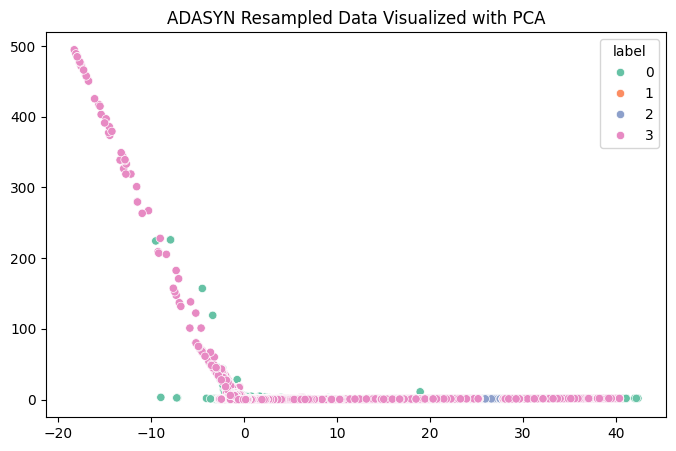

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_resampled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_resampled, palette="Set2")
plt.title("ADASYN Resampled Data Visualized with PCA")
plt.show()


In [16]:
from collections import Counter
print("Before ADASYN:", Counter(y_train))
print("After ADASYN:", Counter(y_resampled))


Before ADASYN: Counter({0: 268678, 2: 44312, 3: 27307, 1: 1803})
After ADASYN: Counter({1: 268732, 0: 268678, 2: 268660, 3: 268255})


In [17]:
# Required Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from collections import Counter

# Load Data
df = pd.read_csv("all_three.csv")

# Set target column
target_column = 'label'
X = df.drop(columns=[target_column])
y = df[target_column]

# Define split ratios
split_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

# For each ratio
for train_ratio, test_ratio in split_ratios:
    print(f"\n🔷 Split Ratio {int(train_ratio*100)}:{int(test_ratio*100)}")

    # 1. Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42, stratify=y
    )

    # 2. Show original training class distribution
    print("📊 Before ADASYN (Train Set):", Counter(y_train))

    # 3. Apply ADASYN
    adasyn = ADASYN(random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

    # 4. Show new class distribution
    print("🧪 After ADASYN:", Counter(y_resampled))

    # 5. Analyze class growth
    for cls in sorted(Counter(y_resampled)):
        orig = Counter(y_train)[cls]
        synth = Counter(y_resampled)[cls]
        added = synth - orig
        print(f"Class {cls}: Original = {orig}, After ADASYN = {synth} (+{added} samples)")



🔷 Split Ratio 60:40
📊 Before ADASYN (Train Set): Counter({0: 201508, 2: 33234, 3: 20480, 1: 1353})
🧪 After ADASYN: Counter({2: 201546, 0: 201508, 1: 201439, 3: 200817})
Class 0: Original = 201508, After ADASYN = 201508 (+0 samples)
Class 1: Original = 1353, After ADASYN = 201439 (+200086 samples)
Class 2: Original = 33234, After ADASYN = 201546 (+168312 samples)
Class 3: Original = 20480, After ADASYN = 200817 (+180337 samples)

🔷 Split Ratio 70:30
📊 Before ADASYN (Train Set): Counter({0: 235092, 2: 38773, 3: 23894, 1: 1578})
🧪 After ADASYN: Counter({3: 236577, 1: 235149, 0: 235092, 2: 235089})
Class 0: Original = 235092, After ADASYN = 235092 (+0 samples)
Class 1: Original = 1578, After ADASYN = 235149 (+233571 samples)
Class 2: Original = 38773, After ADASYN = 235089 (+196316 samples)
Class 3: Original = 23894, After ADASYN = 236577 (+212683 samples)

🔷 Split Ratio 80:20
📊 Before ADASYN (Train Set): Counter({0: 268678, 2: 44312, 3: 27307, 1: 1803})
🧪 After ADASYN: Counter({3: 270447

In [ ]:
results = []

for train_ratio, test_ratio in split_ratios:
    ...
    results.append({
        "Technique_Name": "ADASYN",
        "Splitting Ratio": f"{int(train_ratio*100)}:{int(test_ratio*100)}:00",
        "Sample 0": Counter(y_resampled)[0],
        "Sample 1": Counter(y_resampled)[1],
        "Sample 2": Counter(y_resampled)[2],
        "Sample 3": Counter(y_resampled)[3],
        "Condition of Oversampling": "Class 1 oversampled to match majority"
    })

df_result = pd.DataFrame(results)
display(df_result)


,Technique_Name,Splitting Ratio,Sample 0,Sample 1,Sample 2,Sample 3,Condition of Oversampling
0,ADASYN,60:40:00,268678,268988,268744,270447,Class 1 oversampled to match majority
1,ADASYN,70:30:00,268678,268988,268744,270447,Class 1 oversampled to match majority
2,ADASYN,80:20:00,268678,268988,268744,270447,Class 1 oversampled to match majority


SOME IMPROVEMENTS

In [20]:
# 📦 Install if needed (run only once)
# !pip install imbalanced-learn scikit-learn pandas matplotlib seaborn

# 📚 Imports
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
import warnings
warnings.filterwarnings("ignore")

# 🧾 Load Data
df = pd.read_csv("all_three.csv")

# 🎯 Set target column
target_column = 'label'  # <-- Confirm this is your target
X = df.drop(columns=[target_column])
y = df[target_column]

# 🧪 Define split ratios and results container
split_ratios = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
results = []

# 🔁 For each train:test ratio
for train_ratio, test_ratio in split_ratios:
    print(f"\n🔹 Split {int(train_ratio*100)}:{int(test_ratio*100)}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, stratify=y, random_state=42
    )

    # Show original training distribution
    print("Before ADASYN:", Counter(y_train))

    # 🔧 Apply controlled ADASYN (limit only class 1 to 50,000)
    adasyn = ADASYN(sampling_strategy={1: 50000}, n_neighbors=5, random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

    # Show new class distribution
    print("After ADASYN:", Counter(y_resampled))

    # 🚀 Train Random Forest
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    # 📊 Metrics
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    rec_class1 = recall_score(y_test, y_pred, average=None)[1]  # class 1 recall

    # 🧪 Also train baseline with class_weight='balanced'
    clf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)
    clf_bal.fit(X_train, y_train)
    y_pred_bal = clf_bal.predict(X_test)

    acc_bal = accuracy_score(y_test, y_pred_bal)
    f1_macro_bal = f1_score(y_test, y_pred_bal, average='macro')
    rec_class1_bal = recall_score(y_test, y_pred_bal, average=None)[1]

    # 🧾 Collect result
    results.append({
        "Technique": "ADASYN",
        "Split": f"{int(train_ratio*100)}:{int(test_ratio*100)}:00",
        "Sample 0": Counter(y_resampled)[0],
        "Sample 1": Counter(y_resampled)[1],
        "Sample 2": Counter(y_resampled)[2],
        "Sample 3": Counter(y_resampled)[3],
        "Accuracy": round(acc, 4),
        "F1_macro": round(f1_macro, 4),
        "Recall_Class1": round(rec_class1, 4),
        "Condition": "Only Class 1 oversampled to 50K"
    })

    results.append({
        "Technique": "ClassWeight-Balanced",
        "Split": f"{int(train_ratio*100)}:{int(test_ratio*100)}:00",
        "Sample 0": Counter(y_train)[0],
        "Sample 1": Counter(y_train)[1],
        "Sample 2": Counter(y_train)[2],
        "Sample 3": Counter(y_train)[3],
        "Accuracy": round(acc_bal, 4),
        "F1_macro": round(f1_macro_bal, 4),
        "Recall_Class1": round(rec_class1_bal, 4),
        "Condition": "No oversampling, balanced weighting"
    })

# 🧾 Final table
df_results = pd.DataFrame(results)
print("\n📊 Final Results Summary")
display(df_results)



🔹 Split 60:40
Before ADASYN: Counter({0: 201508, 2: 33234, 3: 20480, 1: 1353})
After ADASYN: Counter({0: 201508, 1: 49927, 2: 33234, 3: 20480})

🔹 Split 70:30
Before ADASYN: Counter({0: 235092, 2: 38773, 3: 23894, 1: 1578})
After ADASYN: Counter({0: 235092, 1: 50060, 2: 38773, 3: 23894})

🔹 Split 80:20
Before ADASYN: Counter({0: 268678, 2: 44312, 3: 27307, 1: 1803})
After ADASYN: Counter({0: 268678, 1: 50288, 2: 44312, 3: 27307})

📊 Final Results Summary


,Technique,Split,Sample 0,Sample 1,Sample 2,Sample 3,Accuracy,F1_macro,Recall_Class1,Condition
0,ADASYN,60:40:00,201508,49927,33234,20480,0.9856,0.9729,0.9978,Only Class 1 oversampled to 50K
1,ClassWeight-Balanced,60:40:00,201508,1353,33234,20480,0.9859,0.9732,0.9911,"No oversampling, balanced weighting"
2,ADASYN,70:30:00,235092,50060,38773,23894,0.9855,0.9723,0.9970,Only Class 1 oversampled to 50K
3,ClassWeight-Balanced,70:30:00,235092,1578,38773,23894,0.9859,0.9728,0.9911,"No oversampling, balanced weighting"
4,ADASYN,80:20:00,268678,50288,44312,27307,0.9850,0.9708,0.9978,Only Class 1 oversampled to 50K
5,ClassWeight-Balanced,80:20:00,268678,1803,44312,27307,0.9856,0.9712,0.9889,"No oversampling, balanced weighting"
